# Airbnb Pricing Project -- Milan

### Prediction with Machine Learning for Economist - Assignment 2

### Amirhooshang Navaei - CEU , Fall 2023

* We start with importing the necessary libraries.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.inspection import permutation_importance
# from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

## 1- Data Cleaning Process:
### 1.1. Loading the current dataset:

In [81]:
data = pd.read_csv('listings.csv')

data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20230913045258,2023-09-14,city scrape,Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,...,5.00,4.56,4.67,NaN,f,1,0,1,0,0.07
1,23986,https://www.airbnb.com/rooms/23986,20230913045258,2023-09-14,city scrape,Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...,I look forward to welcoming you in my flat; it...,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,...,4.73,4.69,4.46,NaN,f,1,1,0,0,0.19
2,1734055,https://www.airbnb.com/rooms/1734055,20230913045258,2023-09-14,city scrape,Rental unit in Milan · ★4.58 · 1 bedroom · 1 b...,"A cozy penthouse in China Town, just a few ste...","Milan’s Chinatown, known in Italian as Quartie...",https://a0.muscache.com/pictures/d1a8b813-f38c...,9134504,...,5.00,4.74,4.53,NaN,f,1,1,0,0,0.20
3,189441,https://www.airbnb.com/rooms/189441,20230913045258,2023-09-13,city scrape,Loft in Milano · ★4.70 · 1 bedroom · 1 bed · 1...,<b>The space</b><br />A lovely loft close to c...,NaN,https://a0.muscache.com/pictures/2768235/ce578...,913914,...,4.86,4.25,4.60,015146-LNI-00630,f,1,0,1,0,1.00
4,2192436,https://www.airbnb.com/rooms/2192436,20230913045258,2023-09-14,city scrape,Rental unit in Milan · ★4.85 · 1 bedroom · 1 b...,"Benvenuti nel nostro bel bilocale, situato n...","Il quartiere appare caldo, accogliente, vitale...",https://a0.muscache.com/pictures/ad16d0e0-9ac1...,11180301,...,4.95,4.79,4.76,NaN,t,1,1,0,0,1.47


* We add an ID column ('new_data') to distinguish the current dataset from December dataset.

In [82]:
# Adding the ID column to the dataframe
data['new_data'] = 1

### 1.2 December Dataset - Testing the trained models on an older dataset:

* To ensure that both datasets have the same format and can be used to train models, we load the December dataset and assign it a different ID. 
* This way, we can apply the same cleaning process on both datasets. 
* In the final step of data cleaning, we use this key to separate the datasets and remove the ID column.

In [83]:
# loading the Decemeber 2022 dataset
data2 = pd.read_csv('listings-Dec2022.csv')

# adding the ID column to December dataframe
data2['new_data'] = 0

* Merging 2 datasets:

In [84]:
# merging the two data frames
data = pd.concat([data, data2])

# checking the shape of the new data frame
data.shape

(43108, 76)

### 1.2 Dropping the unnecessary columns

* The following columns appear highly correlated to other features or uninformative for our problem.

In [85]:
drop_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped','source', 'description', 'neighborhood_overview',
              'picture_url', 'host_id','host_url', 'host_name', 'host_total_listings_count','host_since',
              'host_location','host_verifications' ,'host_about','host_is_superhost' ,'host_thumbnail_url',
              'host_picture_url','host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed',
              'latitude', 'longitude', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
              'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm', 'calendar_updated', 'availability_60', 'availability_90', 'availability_365', 
              'calendar_last_scraped', 'first_review', 'last_review', 'number_of_reviews_ltm', 'review_scores_accuracy',
              'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'number_of_reviews_l30d',
              'host_listings_count', 'review_scores_location', 'review_scores_value', 'license', 'calculated_host_listings_count',
              'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
              'calculated_host_listings_count_shared_rooms']

data = data.drop(drop_cols, axis=1)
data.shape

(43108, 22)

In [86]:
data.head()

,name,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,beds,amenities,price,has_availability,availability_30,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,new_data
0,Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...,NaN,NaN,0%,t,f,TIBALDI,Private room in rental unit,Private room,1,...,1.0,"[""Washer"", ""Kitchen"", ""Paid parking on premise...",$100.00,t,23,12,4.89,f,0.07,1
1,Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...,within a day,100%,56%,t,t,NAVIGLI,Entire rental unit,Entire home/apt,4,...,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Extra p...",$150.00,t,23,26,4.64,f,0.19,1
2,Rental unit in Milan · ★4.58 · 1 bedroom · 1 b...,within a day,100%,50%,t,t,SARPI,Entire rental unit,Entire home/apt,2,...,1.0,"[""Dishwasher"", ""Heating"", ""Hangers"", ""Dryer"", ...",$171.00,t,24,20,4.58,f,0.20,1
3,Loft in Milano · ★4.70 · 1 bedroom · 1 bed · 1...,within an hour,100%,89%,t,t,BOVISASCA,Private room in loft,Private room,1,...,1.0,"[""HDTV with Netflix"", ""Dishwasher"", ""Heating"",...",$40.00,t,13,142,4.70,f,1.00,1
4,Rental unit in Milan · ★4.85 · 1 bedroom · 1 b...,within an hour,100%,75%,t,t,TORTONA,Entire rental unit,Entire home/apt,2,...,1.0,"[""Heating"", ""Shower gel"", ""Hangers"", ""Room-dar...",$94.00,t,1,169,4.85,t,1.47,1


### 1.3. Checking for missing values:

In [87]:
data.isnull().sum()

name                          7
host_response_time        11095
host_response_rate        11095
host_acceptance_rate       8030
host_has_profile_pic          0
host_identity_verified        0
neighbourhood_cleansed        0
property_type                 0
room_type                     0
accommodates                  0
bathrooms_text               24
bedrooms                   6847
beds                        555
amenities                     0
price                         0
has_availability              0
availability_30               0
number_of_reviews             0
review_scores_rating       8392
instant_bookable              0
reviews_per_month          8392
new_data                      0
dtype: int64

* It seems that there are a lot of missing values for number of the "bedrooms" which could be an important feature. 
* The good point is that we can extract the number of bedrooms from the column "name". 

In [88]:
# Extracting number of bedrooms from the column "name"
data['num_bedrooms'] = data['name'].str.extract('(\d+) bedroom', expand=True)

# checking for missing values in the new column
data['num_bedrooms'].isnull().sum()

<>:2: DeprecationWarning: invalid escape sequence '\d'
<>:2: DeprecationWarning: invalid escape sequence '\d'
C:\Users\PA\AppData\Local\Temp\ipykernel_13668\1720303641.py:2: DeprecationWarning: invalid escape sequence '\d'
  data['num_bedrooms'] = data['name'].str.extract('(\d+) bedroom', expand=True)


20253

* We can replace the missing value of the original "bedrooms" column with the new feature values.

In [89]:
# Replacing the missing values in column "bedrooms" with the values in column "num_bedrooms"
data['bedrooms'] = data['bedrooms'].fillna(data['num_bedrooms'])

# checking for missing values in the "bedrooms" column
data['bedrooms'].isnull().sum()

2869

In [90]:
# dropping the "num_bedrooms" column
data = data.drop('num_bedrooms', axis=1)

* Dropping the observations with missing values for "bedrooms":

In [91]:
# dropping the rows with missing values in the "bedrooms" column
data = data.dropna(subset=['bedrooms'])

* It does not seem that these 3 variables are very esseintial to our model: "host_response_time", "host_response_rate", "host_acceptance_rate".
* Considering the number of missing values for these columns, a trivial choice is to drop them as well. 

In [92]:
# Dropping the columns with many missing values
data = data.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1)

In [93]:
# dropping the rows with missing values in the "beds" and "bathrooms_text" columns
data = data.dropna(subset=['beds', 'bathrooms_text'])

* Upon examining the data more closely, it becomes apparent that the 0 ratings may actually represent missing values. 
* If the number of such observations is small, we can simply remove them. 
* However, if there are a significant number of these observations, it would be more appropriate to replace them with the mean value.

In [94]:
# Checking for the number of observations with zero ratings
data[data['review_scores_rating'] == 0].shape

(318, 19)

In [95]:
# dropping the rows with zero ratings
data = data[data['review_scores_rating'] != 0]

In [96]:
# checking the statistics of the "review_scores_rating" column
data['review_scores_rating'].describe()

count    31669.000000
mean         4.685539
std          0.464426
min          1.000000
25%          4.580000
50%          4.830000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

* It seems plausible to replace the missing values with the mean.

In [97]:
# replacing the missing values in the "review_scores_rating" column with the mean
data['review_scores_rating'] = data['review_scores_rating'].fillna(data['review_scores_rating'].mean())

# replacing the missing values in the "reviews_per_month" column with the mean
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

In [98]:
data.isnull().sum()

name                      6
host_has_profile_pic      0
host_identity_verified    0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
amenities                 0
price                     0
has_availability          0
availability_30           0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
reviews_per_month         0
new_data                  0
dtype: int64

In [99]:
# Dropping the column "name"; we have extracted all the information we needed from this column
data = data.drop('name', axis=1)

### 1.4. Encoding Categorical Variables

In [100]:
# Checking the data types of the columns
data.dtypes

host_has_profile_pic       object
host_identity_verified     object
neighbourhood_cleansed     object
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                   object
beds                      float64
amenities                  object
price                      object
has_availability           object
availability_30             int64
number_of_reviews           int64
review_scores_rating      float64
instant_bookable           object
reviews_per_month         float64
new_data                    int64
dtype: object

* These variables are categorical and need to be converted: 
"host_has_profile_pic", "host_identity_verified", 'neighbourhood_cleansed', 'property_type', 'room_type', 'has_availability', 'instant_bookable'

In [101]:
# Checking the unique values in the "property_type" column
data['property_type'].unique()

array(['Private room in rental unit', 'Entire rental unit',
       'Private room in loft', 'Entire condo', 'Room in boutique hotel',
       'Entire loft', 'Entire home', 'Private room in condo',
       'Private room in bed and breakfast', 'Entire vacation home',
       'Shared room in rental unit', 'Private room in villa',
       'Private room in home', 'Entire villa',
       'Private room in guest suite', 'Private room in townhouse',
       'Entire guest suite', 'Entire serviced apartment', 'Entire place',
       'Shared room in home', 'Entire guesthouse', 'Casa particular',
       'Room in aparthotel', 'Tiny home', 'Entire townhouse',
       'Shared room in condo', 'Private room in camper/rv', 'Camper/RV',
       'Private room', 'Shared room in hostel', 'Private room in hostel',
       'Private room in vacation home', 'Room in bed and breakfast',
       'Room in hostel', 'Dome', 'Island', 'Entire chalet',
       'Private room in serviced apartment', 'Private room in farm stay',
     

In [102]:
# Checking the unique values in the "room_type" column
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [103]:
# Converting the above columns to categorical variables
data['host_has_profile_pic'] = data['host_has_profile_pic'].astype('category')
data['host_identity_verified'] = data['host_identity_verified'].astype('category')
data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].astype('category')
data['room_type'] = data['room_type'].astype('category')
data['has_availability'] = data['has_availability'].astype('category')
data['instant_bookable'] = data['instant_bookable'].astype('category')
data['property_type'] = data['property_type'].astype('category')

* These 3 columns need to be converted to numeric type: "bathrooms_text", "bedrooms", "price"

In [104]:
data['bathrooms_text'].head()

0        3.5 baths
1           1 bath
2           1 bath
3    1 shared bath
4           1 bath
Name: bathrooms_text, dtype: object

In [105]:
# Extracting the numeric values of bathrooms
data['bathrooms'] = data['bathrooms_text'].str.extract('(\d+) ', expand=True)

# Converting the column to numeric type
data['bathrooms'] = pd.to_numeric(data['bathrooms'])

# Dropping the original column
data = data.drop('bathrooms_text', axis=1)

# Converting the "bedrooms" column to numeric
data['bedrooms'] = pd.to_numeric(data['bedrooms'])

<>:2: DeprecationWarning: invalid escape sequence '\d'
<>:2: DeprecationWarning: invalid escape sequence '\d'
C:\Users\PA\AppData\Local\Temp\ipykernel_13668\1682680898.py:2: DeprecationWarning: invalid escape sequence '\d'
  data['bathrooms'] = data['bathrooms_text'].str.extract('(\d+) ', expand=True)


In [106]:
data['price'].head()

0    $100.00
1    $150.00
2    $171.00
3     $40.00
4     $94.00
Name: price, dtype: object

In [107]:
# Extracting the numberic values from the target column
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['price'] = pd.to_numeric(data['price'])

C:\Users\PA\AppData\Local\Temp\ipykernel_13668\575610390.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '')


### 1.5. Converting the categorical variables to dummy variables

In [108]:
data = pd.get_dummies(data, columns= ['host_has_profile_pic', 'host_identity_verified', 
                                      'neighbourhood_cleansed', 'room_type', 'has_availability',
                                      'instant_bookable', 'property_type'] ,drop_first=True)

In [109]:
data.shape

(39395, 156)

### 1.6. Considering the strings as dummies! 

* The "amenities" column contains several strings which can each be considered as a dummy variable.

In [110]:
data['amenities'].head()

0    ["Washer", "Kitchen", "Paid parking on premise...
1    ["Hot water", "Washer", "Bed linens", "Extra p...
2    ["Dishwasher", "Heating", "Hangers", "Dryer", ...
3    ["HDTV with Netflix", "Dishwasher", "Heating",...
4    ["Heating", "Shower gel", "Hangers", "Room-dar...
Name: amenities, dtype: object

In [111]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
data['amenities'] = data['amenities'].str.strip('[]').str.replace('"', '').str.split(',')
data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('amenities')),
                                columns=mlb.classes_,
                                index=data.index))

In [112]:
# Removing the columns without proper names
data = data.drop(['', ' '], axis=1)

In [113]:
data.shape

(70605, 4223)

### 1.7. Filtering the observations based on the number of the guests

In [114]:
data = data[(data['accommodates'] >= 2) & (data['accommodates'] <= 6)]

### 1.8. Filtering the observations based on the Price

C:\Users\PA\AppData\Local\Temp\ipykernel_13668\82555254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


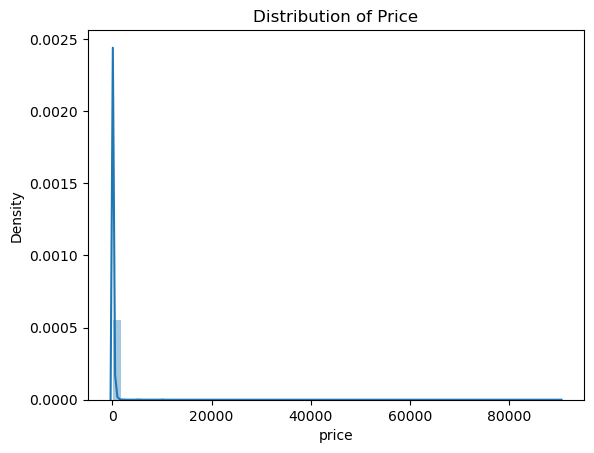

In [115]:
# Checking the distribution of the target variable
sns.distplot(data['price'])
plt.title('Distribution of Price')
plt.show()

* From the figure shown above, it is evident that certain rooms have significantly unusual prices. 
* Including such observations in our model may lead to inaccuracies due to the presence of noise in the data. 
* To avoid this, we need to limit our study to a specific price range.

In [116]:
data.price.describe(percentiles = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.995]).map('{:,.1f}'.format)

count    64,618.0
mean        186.7
std       1,210.0
min           9.0
1%           30.0
10%          56.0
25%          79.0
50%         110.0
75%         171.0
90%         272.0
99%         950.0
99.5%     1,396.0
max      90,180.0
Name: price, dtype: object

### 1.8.1: Droppping the outliers:

* It is sensible to focus on the 99% of observations with prices lower than $1000 and disregard the remaining 1% in our models.

In [117]:
# Dropping the outliers (observations with a price higher than 1000)
data = data[data['price'] <= 1000]

In [118]:
data.shape

(64225, 4223)

### 1.9. Dropping the observations with missing values

In [119]:
# checking the missing values
sum(data.isnull().sum())

51

In [120]:
# dropping the rows with missing values
data = data.dropna()

### 1.10. Dropping the columns with more than 99% zeros
* Our current dataset contains a total of 4223 columns, which can make computations very costly. 
* However, we also have a large number of amenities that only have one active observation, marked as (1). 
* For this reason, it would be reasonable to exclude such columns from our analysis. 
* This approach not only increases computational efficiency but also enhances the accuracy of our models.

In [121]:
# checking the percentage of zeros in each column
data_zero = (data == 0).astype(int).sum(axis=0)
data_zero = data_zero/data.shape[0]
data_zero = data_zero.sort_values(ascending=False)

# Checking the number of columns with more than 99% zeros
data_zero[data_zero > 0.99].shape[0]

3997

In [122]:
# Dropping the columns with more than 99% zeros
data_2 = data.drop(data_zero[data_zero > 0.99].index, axis=1)

In [123]:
data_2.shape, data.shape

((64174, 226), (64174, 4223))

### 1.11. Separating the Current and December Dataset

* Now, we are almost done with data cleaning and can split 2 dataset using the ID column.

In [124]:
data_new = data_2[data_2['new_data'] == 1]
data_dec = data_2[data_2['new_data'] == 0]

In [125]:
# Dropping the "new_data" column
data_new = data_new.drop('new_data', axis=1)
data_dec = data_dec.drop('new_data', axis=1)

In [126]:
data_new.shape, data_dec.shape

((34523, 225), (29651, 225))

# 2. Splitting the Data:

### 2.1. Splitting target and explanatory variables

In [127]:
# Splitting target variable and predictors
X = data_new.drop('price', axis=1)
y = data_new['price']

* Following the same process for the December Dataset:

In [128]:
# Splitting target variable and predictors for the Dec data
X_dec = data_dec.drop('price', axis=1)
y_dec = data_dec['price']

### 2.2. Splitting test and train sets

In [129]:
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.3. Scaling the features:

* For linear regression it is necessary to scale the data.

In [130]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
# Scaling the December data
X_dec_scaled = scaler.transform(X_dec)

# 3.Models

* In the first step, we create some empty lists to store the results of model performances.

In [132]:
# Preparing some lists to store the results
models = []
Train_RMSE = []
Test_RMSE = []
Dec_RMSE = []

## 3.1. OLS using LASSO

### 3.1.1. LASSO - Feature Selection

* We have a variety of features available, however, it is possible that some of them may not be relevant to predicting prices. 
* To address this, we use LASSO in the initial stage to remove any redundant features. 
* Once this is done, we apply the OLS model to the remaining features.

In [133]:
# Avoiding the ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Calling the LassoCV module for optimal regularization parameter
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# Lasso- Parameter tuning using cross validation
alphas = np.logspace(-6, 2, 20)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Storing the best regularization value
selected_alpha = lasso_cv.alpha_
print("Best lambda value: ", selected_alpha)

warnings.resetwarnings()

Best lambda value:  0.2976351441631313


In [134]:
# Define the LASSO model using the best parameter
best_lasso_model = Lasso(alpha=selected_alpha)
best_lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.2976351441631313)

In [135]:
# Checking the number of non-zero coefficients of the LASSO model
print("Number of non-zero coefficients: ", np.sum(best_lasso_model.coef_ != 0))

Number of non-zero coefficients:  180


In [136]:
# Selecting the features from the LASSO model that have a non-zero coefficient
selected_features = X.columns[best_lasso_model.coef_ != 0]

In [137]:
# filtering training and test sets based on the selected features
X_train_selected = X_train_scaled[:, best_lasso_model.coef_ != 0]
X_test_selected = X_test_scaled[:, best_lasso_model.coef_ != 0]

In [138]:
# selecting the same features for the December data
X_dec_selected = X_dec_scaled[:, best_lasso_model.coef_ != 0]

### 3.1.2. Linear Regression model - OLS

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Creating a linear regression model
ols_model = LinearRegression()

# Fitting the model
ols_model.fit(X_train_selected, y_train)

# Checking the model performance on the training data
y_train_pred = ols_model.predict(X_train_selected)
ols_train_mse = mean_squared_error(y_train, y_train_pred)
ols_train_rmse = np.sqrt(ols_train_mse)
ols_train_mae = np.mean(np.abs(y_train - y_train_pred))
ols_train_r2 = r2_score(y_train, y_train_pred)
print('Training MSE:', ols_train_mse, '\n', 'Training RMSE:', ols_train_rmse,
      '\n', 'Training MAE:', ols_train_mae, '\n', 'Training R2:', ols_train_r2)

# Checking the model performance on the test data
y_test_pred = ols_model.predict(X_test_selected)
ols_test_mse = mean_squared_error(y_test, y_test_pred)
ols_test_rmse = np.sqrt(ols_test_mse)
ols_test_mae = np.mean(np.abs(y_test - y_test_pred))
ols_test_r2 = r2_score(y_test, y_test_pred)
print('Test MSE:', ols_test_mse, '\n', 'Test RMSE:', ols_test_rmse,
      '\n', 'Test MAE:', ols_test_mae, '\n', 'Test R2:', ols_test_r2)

Training MSE: 12000.884638238103 
 Training RMSE: 109.54854922927142 
 Training MAE: 63.91132042579098 
 Training R2: 0.27672673040685836
Test MSE: 11231.475337202311 
 Test RMSE: 105.97865510187565 
 Test MAE: 63.93454647939038 
 Test R2: 0.25569940521384604


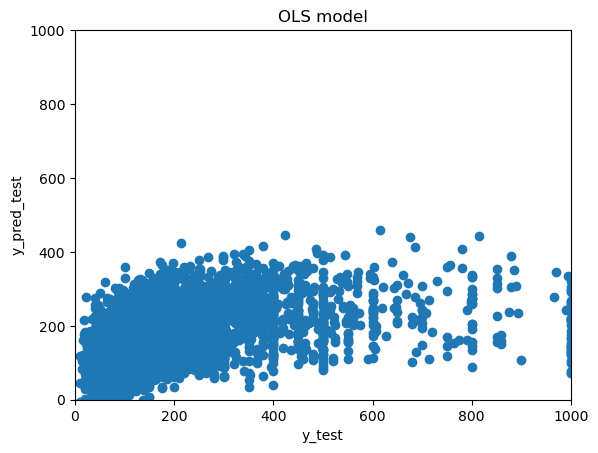

In [140]:
# Plotting the results of OLS prediction
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('OLS model')
plt.show()

In [141]:
# Checking the model performance on the December data
y_new_pred = ols_model.predict(X_dec_selected)
ols_new_mse = mean_squared_error(y_dec, y_new_pred)
ols_new_rmse = np.sqrt(ols_new_mse)
ols_new_mae = np.mean(np.abs(y_dec - y_new_pred))
ols_new_r2 = r2_score(y_dec, y_new_pred)
print('New MSE:', ols_new_mse, '\n', 'New RMSE:', ols_new_rmse,
      '\n', 'New MAE:', ols_new_mae, '\n', 'New R2:', ols_new_r2)

New MSE: 10603.897818337564 
 New RMSE: 102.97522914923552 
 New MAE: 72.17716473886091 
 New R2: 0.0795973942860293


In [142]:
# Recording the results
models.append('OLS')
Train_RMSE.append(ols_train_rmse)
Test_RMSE.append(ols_test_rmse)
Dec_RMSE.append(ols_new_rmse)

## 3.2.1. Decision Tree Regression Model (Default parameters)

In [143]:
from sklearn.tree import DecisionTreeRegressor
# Creating a decision tree regression model
dtree_model = DecisionTreeRegressor(random_state=42)

# Fitting the model to the training data
dtree_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = dtree_model.predict(X_train)
dtree_train_mse = mean_squared_error(y_train, y_train_pred)
dtree_train_rmse = np.sqrt(dtree_train_mse)
dtree_train_mae = np.mean(np.abs(y_train - y_train_pred))
dtree_train_r2 = r2_score(y_train, y_train_pred)
print('Training MSE:', dtree_train_mse, '\n', 'Training RMSE:', dtree_train_rmse,
      '\n', 'Training MAE:', dtree_train_mae, '\n', 'Training R2:', dtree_train_r2)

# Checking the model performance on the test data
y_test_pred = dtree_model.predict(X_test)
dtree_test_mse = mean_squared_error(y_test, y_test_pred)
dtree_test_rmse = np.sqrt(dtree_test_mse)
dtree_test_mae = np.mean(np.abs(y_test - y_test_pred))
dtree_test_r2 = r2_score(y_test, y_test_pred)
print('Test MSE:', dtree_test_mse, '\n', 'Test RMSE:', dtree_test_rmse,
      '\n', 'Test MAE:', dtree_test_mae, '\n', 'Test R2:', dtree_test_r2)

Training MSE: 0.41161135479599437 
 Training RMSE: 0.6415694465885937 
 Training MAE: 0.011503765621120583 
 Training R2: 0.9999751928712458
Test MSE: 18777.568818190597 
 Test RMSE: 137.03126949054584 
 Test MAE: 70.93912329825238 
 Test R2: -0.2443739776308469


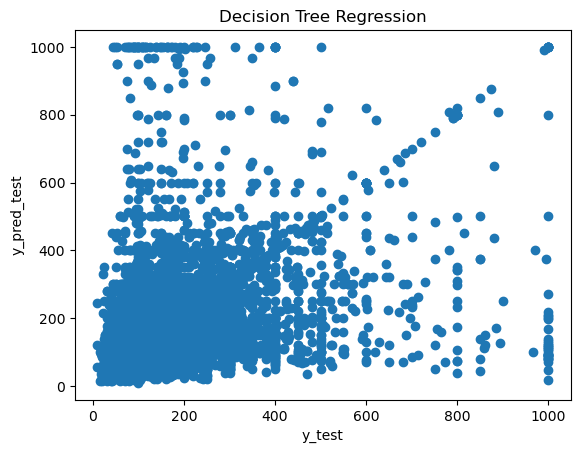

In [144]:
# Plotting the results from the default regression tree model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.title('Decision Tree Regression')
plt.show()

In [145]:
# Checking the model performance on the new data
y_new_pred = dtree_model.predict(X_dec)
dtree_new_mse = mean_squared_error(y_dec, y_new_pred)
dtree_new_rmse = np.sqrt(dtree_new_mse)
dtree_new_mae = np.mean(np.abs(y_dec - y_new_pred))
dtree_new_r2 = r2_score(y_dec, y_new_pred)
print('New MSE:', dtree_new_mse, '\n', 'New RMSE:', dtree_new_rmse,
      '\n', 'New MAE:', dtree_new_mae, '\n', 'New R2:', dtree_new_r2)

New MSE: 21013.60346412937 
 New RMSE: 144.96069627360848 
 New MAE: 79.25134228187919 
 New R2: -0.8239496188258244


In [146]:
# Recording the results
models.append('Decision Tree - Default')
Train_RMSE.append(dtree_train_rmse)
Test_RMSE.append(dtree_test_rmse)
Dec_RMSE.append(dtree_new_rmse)

## 3.2.2. Tuned Regression Tree
 
* Tuning the decision Tree

In [147]:
# defining the grid of parameters
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(3, 20), 'min_samples_leaf': np.arange(5, 20), 'min_samples_split': np.arange(5, 20)}

# defining the model
dtree_model_cv = DecisionTreeRegressor(random_state=42)

# defining the random search
dtree_cv = RandomizedSearchCV(dtree_model_cv, param_grid, cv = 5)

# fitting the model to the training data
dtree_cv.fit(X_train, y_train)
# storing the best parameters
best_params = dtree_cv.best_params_

# printing the best parameters
print("Tuned Decision Tree Parameters: {}".format(best_params))

Tuned Decision Tree Parameters: {'min_samples_split': 10, 'min_samples_leaf': 19, 'max_depth': 10}


* Training and Testing the tuned Regression Tree model:

In [148]:
# Creating a decision tree regression model with the best parameters
dtree_model_best = DecisionTreeRegressor(random_state=42, **best_params)

# Fitting the model to the training data
dtree_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = dtree_model_best.predict(X_train)
dtree_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
dtree_tuned_train_rmse = np.sqrt(dtree_tuned_train_mse)
dtree_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
dtree_tuned_train_r2 = r2_score(y_train, y_train_pred)
print('Training MSE:', dtree_tuned_train_mse, '\n', 'Training RMSE:', dtree_tuned_train_rmse,
      '\n', 'Training MAE:', dtree_tuned_train_mae, '\n', 'Training R2:', dtree_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = dtree_model_best.predict(X_test)
dtree_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
dtree_tuned_test_rmse = np.sqrt(dtree_tuned_test_mse)
dtree_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
dtree_tuned_test_r2 = r2_score(y_test, y_test_pred)
print('Test MSE:', dtree_tuned_test_mse, '\n', 'Test RMSE:', dtree_tuned_test_rmse,
      '\n', 'Test MAE:', dtree_tuned_test_mae, '\n', 'Test R2:', dtree_tuned_test_r2)

Training MSE: 10831.587838464493 
 Training RMSE: 104.07491454939799 
 Training MAE: 61.0082846246558 
 Training R2: 0.347198295211536
Test MSE: 11063.299428602255 
 Test RMSE: 105.18222011634026 
 Test MAE: 63.227326822448724 
 Test R2: 0.2668442837842605


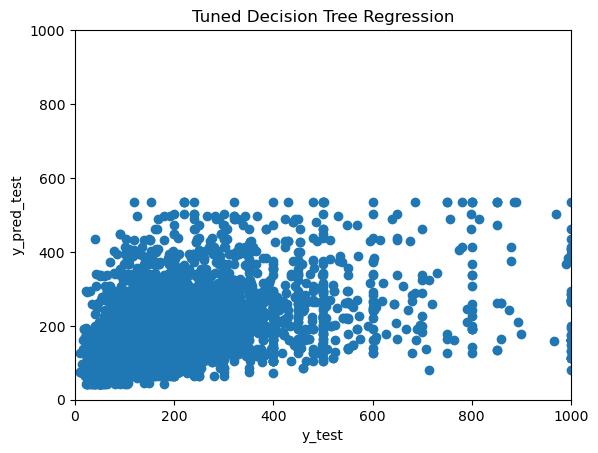

In [149]:
# Plotting the results from the Tuned regression tree model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Tuned Decision Tree Regression')
plt.show()

In [150]:
# Checking the model performance on the new data
y_new_pred = dtree_model_best.predict(X_dec)
dtree_tuned_new_mse = mean_squared_error(y_dec, y_new_pred)
dtree_tuned_new_rmse = np.sqrt(dtree_tuned_new_mse)
dtree_tuned_new_mae = np.mean(np.abs(y_dec - y_new_pred))
dtree_tuned_new_r2 = r2_score(y_dec, y_new_pred)
print('New MSE:', dtree_tuned_new_mse, '\n', 'New RMSE:', dtree_tuned_new_rmse,
      '\n', 'New MAE:', dtree_tuned_new_mae, '\n', 'New R2:', dtree_tuned_new_r2)

New MSE: 10744.472441766686 
 New RMSE: 103.6555470863315 
 New MAE: 69.74682981376142 
 New R2: 0.06739572543576233


In [151]:
# Recording the results
models.append('Decision Tree - Tuned')
Train_RMSE.append(dtree_tuned_train_rmse)
Test_RMSE.append(dtree_tuned_test_rmse)
Dec_RMSE.append(dtree_tuned_new_rmse)

# 3.3. K-Nearest Neighbors (KNN) Regression

### 3.3.1. Default KNN

In [152]:
# Creating a KNN regression model
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor()

# Fitting the model to the training data
knn_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = knn_model.predict(X_train)
knn_train_mse = mean_squared_error(y_train, y_train_pred)
knn_train_rmse = np.sqrt(knn_train_mse)
knn_train_mae = np.mean(np.abs(y_train - y_train_pred))
knn_train_r2 = r2_score(y_train, y_train_pred)
print('Training MSE:', knn_train_mse, '\n', 'Training RMSE:', knn_train_rmse,
      '\n', 'Training MAE:', knn_train_mae, '\n', 'Training R2:', knn_train_r2)

# Checking the model performance on the test data
y_test_pred = knn_model.predict(X_test)
knn_test_mse = mean_squared_error(y_test, y_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)
knn_test_mae = np.mean(np.abs(y_test - y_test_pred))
knn_test_r2 = r2_score(y_test, y_test_pred)
print('Test MSE:', knn_test_mse, '\n', 'Test RMSE:', knn_test_rmse,
      '\n', 'Test MAE:', knn_test_mae, '\n', 'Test R2:', knn_test_r2)

Training MSE: 9032.221549284117 
 Training RMSE: 95.03800055390536 
 Training MAE: 56.69884134734751 
 Training R2: 0.4556430956077039
Test MSE: 13107.26170898909 
 Test RMSE: 114.48694995059083 
 Test MAE: 69.9129091435744 
 Test R2: 0.13139259152320293


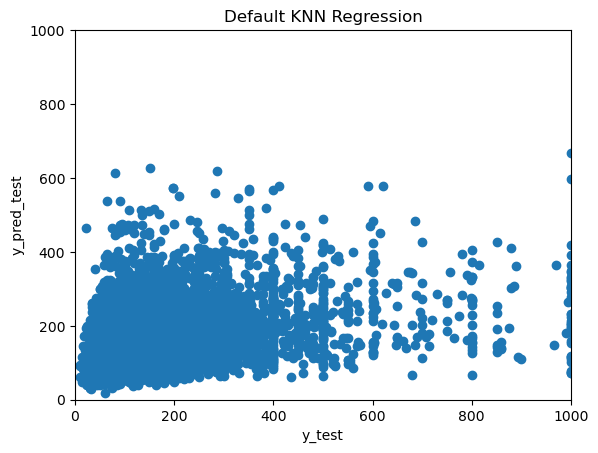

In [153]:
# Plotting the results from the Default KNN model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Default KNN Regression')
plt.show()

In [154]:
# Checking the model performance on the new data
y_new_pred = knn_model.predict(X_dec)
knn_new_mse = mean_squared_error(y_dec, y_new_pred)
knn_new_rmse = np.sqrt(knn_new_mse)
knn_new_mae = np.mean(np.abs(y_dec - y_new_pred))
knn_new_r2 = r2_score(y_dec, y_new_pred)
print('New MSE:', knn_new_mse, '\n', 'New RMSE:', knn_new_rmse,
      '\n', 'New MAE:', knn_new_mae, '\n', 'New R2:', knn_new_r2)

New MSE: 11482.245030417187 
 New RMSE: 107.15523799804276 
 New MAE: 70.57657583218104 
 New R2: 0.0033581588115376704


In [155]:
# Recording the results
models.append('KNN - Default')
Train_RMSE.append(knn_train_rmse)
Test_RMSE.append(knn_test_rmse)
Dec_RMSE.append(knn_new_rmse)

### 3.3.2. Tuned KNN Regression

* Parameter tuning using Randomized Search

In [156]:
# defining the grid of parameters
param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance']}

# defining the model
knn_model_cv = KNeighborsRegressor()

# defining the random search
knn_cv = RandomizedSearchCV(knn_model_cv, param_grid, cv = 5)

# fitting the model to the training data
knn_cv.fit(X_train, y_train)

# storing the best parameters
best_params = knn_cv.best_params_

# printing the best parameters
print("Tuned KNN Parameters: {}".format(best_params))

Tuned KNN Parameters: {'weights': 'distance', 'n_neighbors': 12}


* Defining and fitting the KNN model using the above hyperparameters:

In [157]:
# Creating a KNN regression model with the best parameters
knn_model_best = KNeighborsRegressor(**best_params)
# Fitting the model to the training data
knn_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = knn_model_best.predict(X_train)
knn_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
knn_tuned_train_rmse = np.sqrt(knn_tuned_train_mse)
knn_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
knn_tuned_train_r2 = r2_score(y_train, y_train_pred)
print('Training MSE:', knn_tuned_train_mse, '\n', 'Training RMSE:', knn_tuned_train_rmse,
      '\n', 'Training MAE:', knn_tuned_train_mae, '\n', 'Training R2:', knn_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = knn_model_best.predict(X_test)
knn_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
knn_tuned_test_rmse = np.sqrt(knn_tuned_test_mse)
knn_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
knn_tuned_test_r2 = r2_score(y_test, y_test_pred)
print('Test MSE:', knn_tuned_test_mse, '\n', 'Test RMSE:', knn_tuned_test_rmse,
      '\n', 'Test MAE:', knn_tuned_test_mae, '\n', 'Test R2:', knn_tuned_test_r2)

Training MSE: 0.4116113552921105 
 Training RMSE: 0.6415694469752363 
 Training MAE: 0.01150616289082191 
 Training R2: 0.999975192871216
Test MSE: 12362.628517120263 
 Test RMSE: 111.18735772164146 
 Test MAE: 67.76391038563555 
 Test R2: 0.1807388181733819


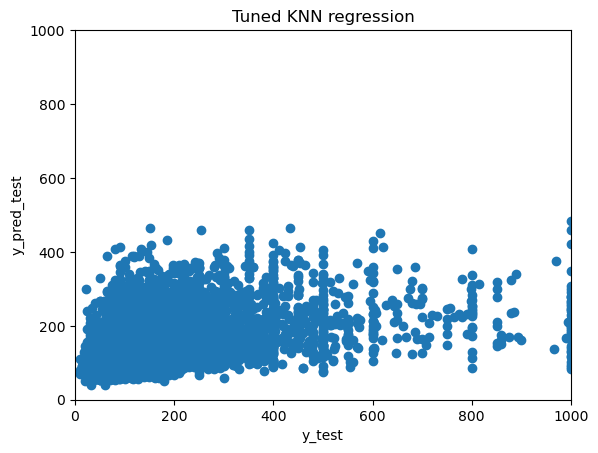

In [158]:
# Plotting the results from the Tuned KNN model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Tuned KNN regression')
plt.show()

In [159]:
# Checking the model performance on the new data
y_new_pred = knn_model_best.predict(X_dec)
knn_tuned_new_mse = mean_squared_error(y_dec, y_new_pred)
knn_tuned_new_rmse = np.sqrt(knn_tuned_new_mse)
knn_tuned_new_mae = np.mean(np.abs(y_dec - y_new_pred))
knn_tuned_new_r2 = r2_score(y_dec, y_new_pred)
print('New MSE:', knn_tuned_new_mse, '\n', 'New RMSE:', knn_tuned_new_rmse,
      '\n', 'New MAE:', knn_tuned_new_mae, '\n', 'New R2:', knn_tuned_new_r2)

New MSE: 10215.93279076633 
 New RMSE: 101.07389767277371 
 New MAE: 68.00424035130011 
 New R2: 0.11327218335132394


In [160]:
# Recording the results
models.append('KNN - Tuned')
Train_RMSE.append(knn_tuned_train_rmse)
Test_RMSE.append(knn_tuned_test_rmse)
Dec_RMSE.append(knn_tuned_new_rmse)

# 3.4. Random Forest Regression

### 3.4.1. RF Model with 100 trees

In [161]:
# Creating a random forest regression model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = rf_model.predict(X_train)
rf_train_mse = mean_squared_error(y_train, y_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_mae = np.mean(np.abs(y_train - y_train_pred))
rf_train_r2 = r2_score(y_train, y_train_pred)
print('Training MSE:', rf_train_mse, '\n', 'Training RMSE:', rf_train_rmse, '\n', 'Training MAE:', rf_train_mae, '\n', 'Training R2:', rf_train_r2)

# Checking the model performance on the test data
y_test_pred = rf_model.predict(X_test)
rf_test_mse = mean_squared_error(y_test, y_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_mae = np.mean(np.abs(y_test - y_test_pred))
rf_test_r2 = r2_score(y_test, y_test_pred)
print('Test MSE:', rf_test_mse, '\n', 'Test RMSE:', rf_test_rmse, '\n', 'Test MAE:', rf_test_mae, '\n', 'Test R2:', rf_test_r2)

Training MSE: 1385.0379271996383 
 Training RMSE: 37.21609768903288 
 Training MAE: 21.002933381413477 
 Training R2: 0.9165260778422696
Test MSE: 9132.151365566622 
 Test RMSE: 95.56229049979193 
 Test MAE: 55.2794031342961 
 Test R2: 0.39481987103205185


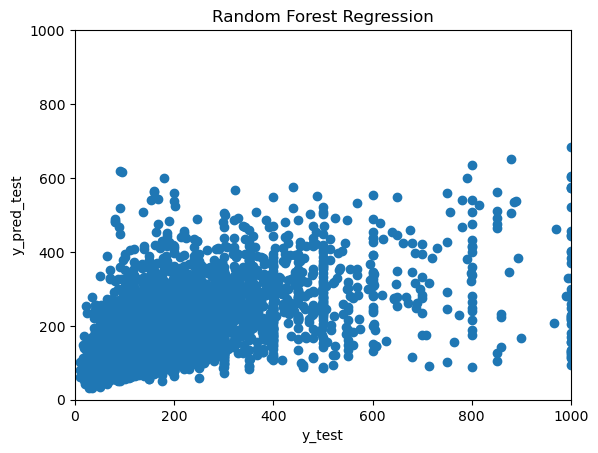

In [162]:
# Plotting the results from the Random Forest model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Random Forest Regression')
plt.show()

In [163]:
# Checking the model performance on the new data
y_new_pred = rf_model.predict(X_dec)
rf_new_mse = mean_squared_error(y_dec, y_new_pred)
rf_new_rmse = np.sqrt(rf_new_mse)
rf_new_mae = np.mean(np.abs(y_dec - y_new_pred))
rf_new_r2 = r2_score(y_dec, y_new_pred)
print('New MSE:', rf_new_mse, '\n', 'New RMSE:', rf_new_rmse, '\n', 'New MAE:', rf_new_mae, '\n', 'New R2:', rf_new_r2)


New MSE: 9208.763421580577 
 New RMSE: 95.9623020856658 
 New MAE: 64.70083780600028 
 New R2: 0.2006929910274201


In [164]:
# Recording the results
models.append('Random Forest - Default')
Train_RMSE.append(rf_train_rmse)
Test_RMSE.append(rf_test_rmse)
Dec_RMSE.append(rf_new_rmse)

### 3.4.2. Random Forest - Tuned

* Hyperparameter tuninng using a Grid Search for a limited range:

In [165]:
# defining the grid of parameters
from sklearn.model_selection import GridSearchCV


param_grid = {"n_estimators": [100, 200, 300, 400, 500],"max_features": ['sqrt'], "min_samples_leaf": [5, 10, 15]}

# defining the model
rf_model_cv = RandomForestRegressor(random_state=42)
# defining the random search
rf_cv = GridSearchCV(rf_model_cv, param_grid, cv = 5)

# fitting the model to the training data
rf_cv.fit(X_train, y_train)

# storing the best parameters
best_params = rf_cv.best_params_

# printing the best parameters
print("Tuned Random Forest Parameters: {}".format(best_params))

Tuned Random Forest Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}


* Defining and fitting the tuned RF model:

In [166]:
# Creating a random forest regression model with the best parameters
# best_params = {'max_features': 'sqrt', 'min_samples_leaf': 5}

rf_model_best = RandomForestRegressor(**best_params)

# Fitting the model to the training data
rf_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = rf_model_best.predict(X_train)
rf_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
rf_tuned_train_rmse = np.sqrt(rf_tuned_train_mse)
rf_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
rf_tuned_train_r2 = r2_score(y_train, y_train_pred)
print('Training MSE:', rf_tuned_train_mse, '\n', 'Training RMSE:', rf_tuned_train_rmse,
      '\n', 'Training MAE:', rf_tuned_train_mae, '\n', 'Training R2:', rf_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = rf_model_best.predict(X_test)
rf_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
rf_tuned_test_rmse = np.sqrt(rf_tuned_test_mse)
rf_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
rf_tuned_test_r2 = r2_score(y_test, y_test_pred)
print('Test MSE:', rf_tuned_test_mse, '\n', 'Test RMSE:', rf_tuned_test_rmse,
      '\n', 'Test MAE:', rf_tuned_test_mae, '\n', 'Test R2:', rf_tuned_test_r2)

Training MSE: 8784.197451768187 
 Training RMSE: 93.72404948447429 
 Training MAE: 53.573293347952486 
 Training R2: 0.47059109363917007
Test MSE: 10682.004524268576 
 Test RMSE: 103.35378330892671 
 Test MAE: 61.85395909938366 
 Test R2: 0.29211238219199653


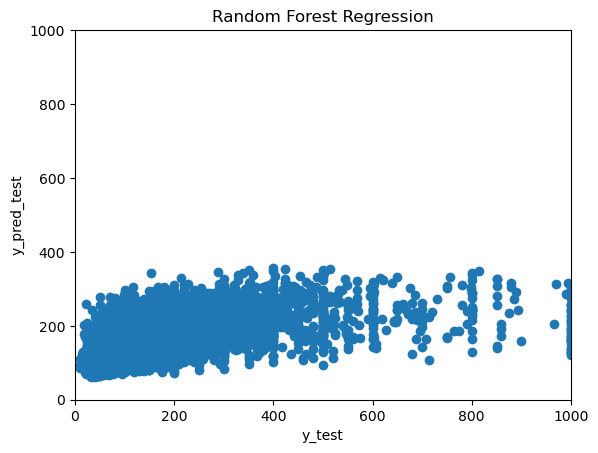

In [167]:
# Plotting the results from the Tuned Random Forest model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Random Forest Regression')
plt.show()

In [168]:
# Checking the model performance on the new data
y_new_pred = rf_model_best.predict(X_dec)
rf_tuned_new_mse = mean_squared_error(y_dec, y_new_pred)
rf_tuned_new_rmse = np.sqrt(rf_tuned_new_mse)
rf_tuned_new_mae = np.mean(np.abs(y_dec - y_new_pred))
rf_tuned_new_r2 = r2_score(y_dec, y_new_pred)
print('New MSE:', rf_tuned_new_mse, '\n', 'New RMSE:', rf_tuned_new_rmse,
      '\n', 'New MAE:', rf_tuned_new_mae, '\n', 'New R2:', rf_tuned_new_r2)

New MSE: 8796.615407662239 
 New RMSE: 93.79027352376279 
 New MAE: 64.7491850739128 
 New R2: 0.23646682744578618


In [169]:
# Recording the results
models.append('Random Forest - Tuned')
Train_RMSE.append(rf_tuned_train_rmse)
Test_RMSE.append(rf_tuned_test_rmse)
Dec_RMSE.append(rf_tuned_new_rmse)

# 3.5. GBM - Default

In [170]:
# Creating a gradient boosting regression model
from sklearn.ensemble import GradientBoostingRegressor

GBM_model = GradientBoostingRegressor(random_state=42)

# Fitting the model to the training data
GBM_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = GBM_model.predict(X_train)
GBM_train_mse = mean_squared_error(y_train, y_train_pred)
GBM_train_rmse = np.sqrt(GBM_train_mse)
GBM_train_mae = np.mean(np.abs(y_train - y_train_pred))
GBM_train_r2 = r2_score(y_train, y_train_pred)
print('Training MSE:', GBM_train_mse, '\n', 'Training RMSE:', GBM_train_rmse,
      '\n', 'Training MAE:', GBM_train_mae, '\n', 'Training R2:', GBM_train_r2)

# Checking the model performance on the test data
y_test_pred = GBM_model.predict(X_test)
GBM_test_mse = mean_squared_error(y_test, y_test_pred)
GBM_test_rmse = np.sqrt(GBM_test_mse)
GBM_test_mae = np.mean(np.abs(y_test - y_test_pred))
GBM_test_r2 = r2_score(y_test, y_test_pred)
print('Test MSE:', GBM_test_mse, '\n', 'Test RMSE:', GBM_test_rmse,
      '\n', 'Test MAE:', GBM_test_mae, '\n', 'Test R2:', GBM_test_r2)

Training MSE: 10767.192947466152 
 Training RMSE: 103.76508539709371 
 Training MAE: 59.52216548323501 
 Training R2: 0.3510792677199346
Test MSE: 10280.191965092867 
 Test RMSE: 101.3912815043427 
 Test MAE: 59.95022731980814 
 Test R2: 0.31874016864106713


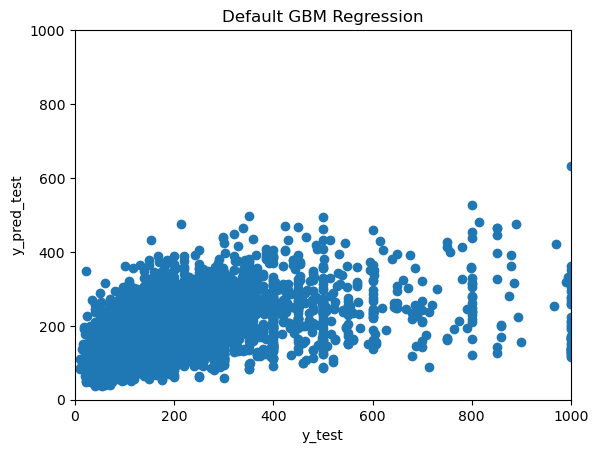

In [171]:
# Plotting the results from the Default GBM model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Default GBM Regression')
plt.show()

In [172]:
# Checking the model performance on the new data
y_new_pred = GBM_model.predict(X_dec)
GBM_new_mse = mean_squared_error(y_dec, y_new_pred)
GBM_new_rmse = np.sqrt(GBM_new_mse)
GBM_new_mae = np.mean(np.abs(y_dec - y_new_pred))
GBM_new_r2 = r2_score(y_dec, y_new_pred)
print('New MSE:', GBM_new_mse, '\n', 'New RMSE:', GBM_new_rmse,
      '\n', 'New MAE:', GBM_new_mae, '\n', 'New R2:', GBM_new_r2)

New MSE: 9444.602377709189 
 New RMSE: 97.18334413730157 
 New MAE: 67.37767125704346 
 New R2: 0.18022251936988887


In [173]:
# Recording the results
models.append('GBM - Default')
Train_RMSE.append(GBM_train_rmse)
Test_RMSE.append(GBM_test_rmse)
Dec_RMSE.append(GBM_new_rmse)

# 4. Results

### 4.1. Performance Table:

In [174]:
# storing the results
results = pd.DataFrame({'Model': models, 'Train_RMSE': Train_RMSE, 'Test_RMSE': Test_RMSE, 'Dec_RMSE': Dec_RMSE})
results = results.sort_values(by='Test_RMSE', ascending=True)
pd.options.display.float_format = '{:,.2f}'.format
results

,Model,Train_RMSE,Test_RMSE,Dec_RMSE
5,Random Forest - Default,37.22,95.56,95.96
7,GBM - Default,103.77,101.39,97.18
6,Random Forest - Tuned,93.72,103.35,93.79
2,Decision Tree - Tuned,104.07,105.18,103.66
0,OLS,109.55,105.98,102.98
4,KNN - Tuned,0.64,111.19,101.07
3,KNN - Default,95.04,114.49,107.16
1,Decision Tree - Default,0.64,137.03,144.96


### 4.1.2. Visualization of the results

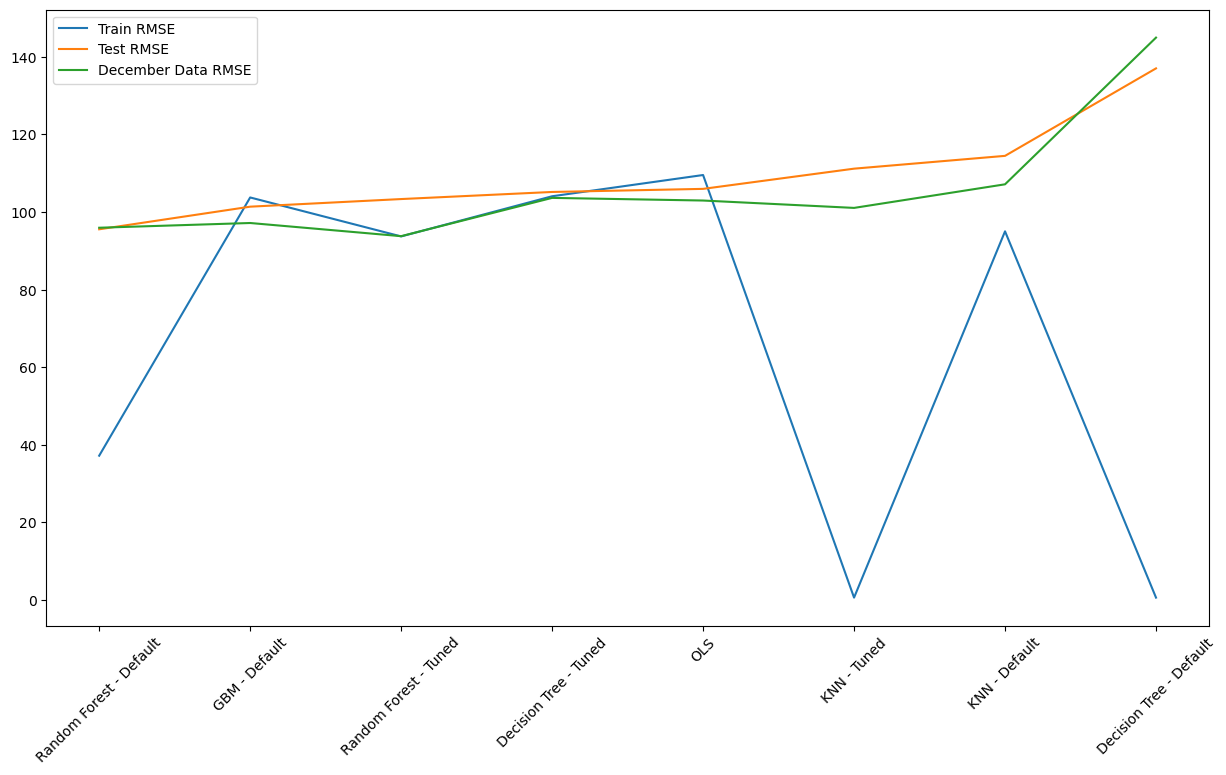

In [175]:
# visualizing the results
plt.figure(figsize=(15, 8))
plt.plot(results['Model'], results['Train_RMSE'], label='Train RMSE')
plt.plot(results['Model'], results['Test_RMSE'], label='Test RMSE')
plt.plot(results['Model'], results['Dec_RMSE'], label='December Data RMSE')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### 4.1.3. Discussion:

* Based on the table above, we can conclude that ensemble methods outperform other models on unseen data.
* Although some models like regression trees and KNN can fit the training data well, none of them could outperform the ensemble models in any iteration of the code.
* It's possible to improve the performance of the OLS model by including interactions and polynomials. However, it's unlikely to outperform RF and GBoost models.

### 4.2. Shapley Values and Visualization

In [176]:
import shap

* After considering all the candidates, we have decided to use the Default Random Forest model to compute and visualize the SHAP values, as it demonstrated the best performance.

In [177]:
# Create a SHAP explainer object for your Random Forest model
explainer = shap.Explainer(rf_model)

# Compute SHAP values for your data
shap_values = explainer(X_train[:100])

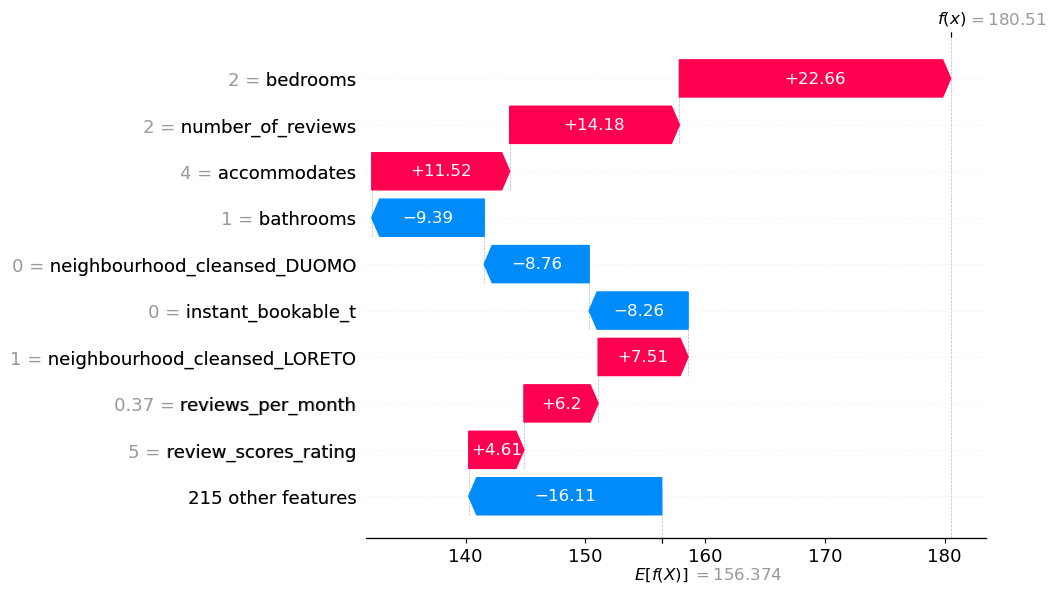

In [178]:
shap.plots.waterfall(shap_values[10])

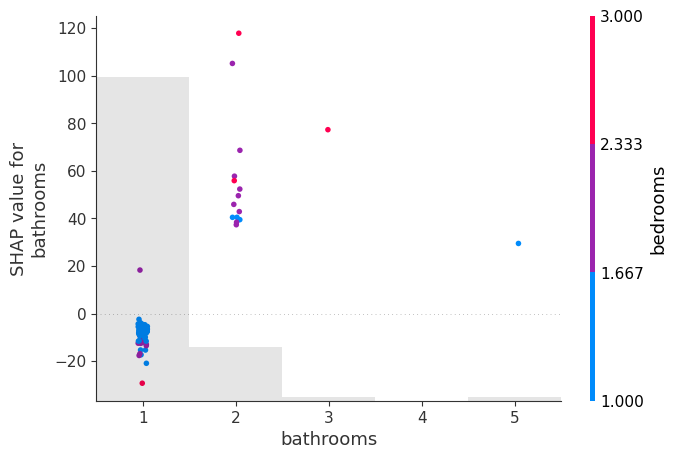

In [179]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "bathrooms"], color=shap_values)

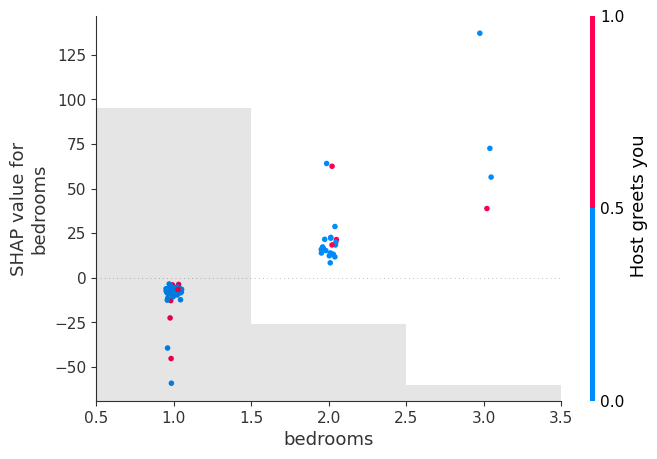

In [180]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "bedrooms"], color=shap_values)

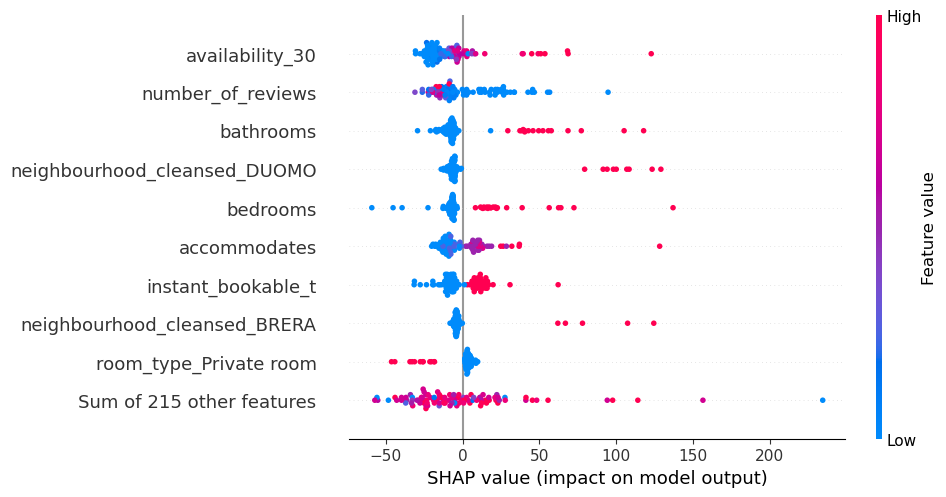

In [181]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

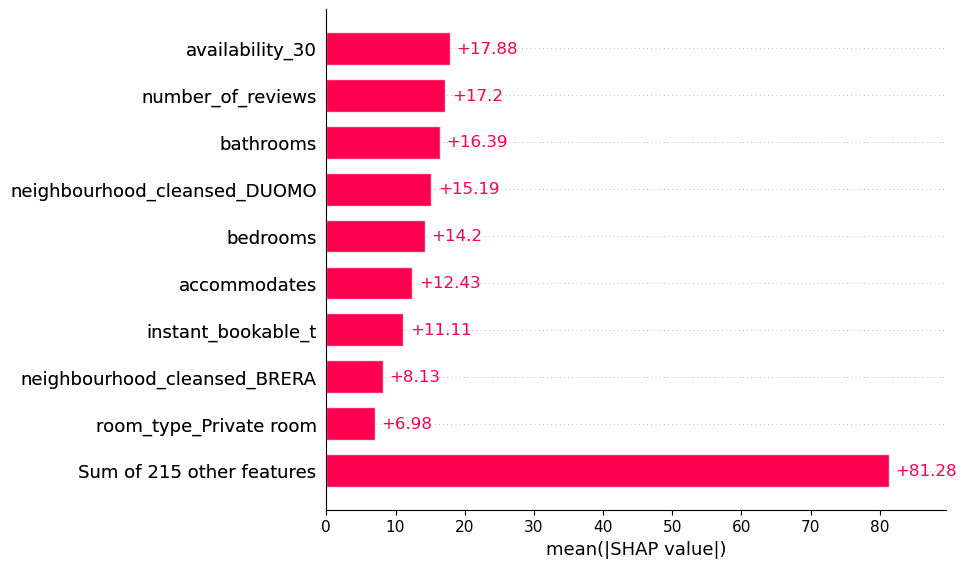

In [182]:
shap.plots.bar(shap_values)

In [183]:
# Compute SHAP values for your data
shap_values = explainer(X_test[:100])

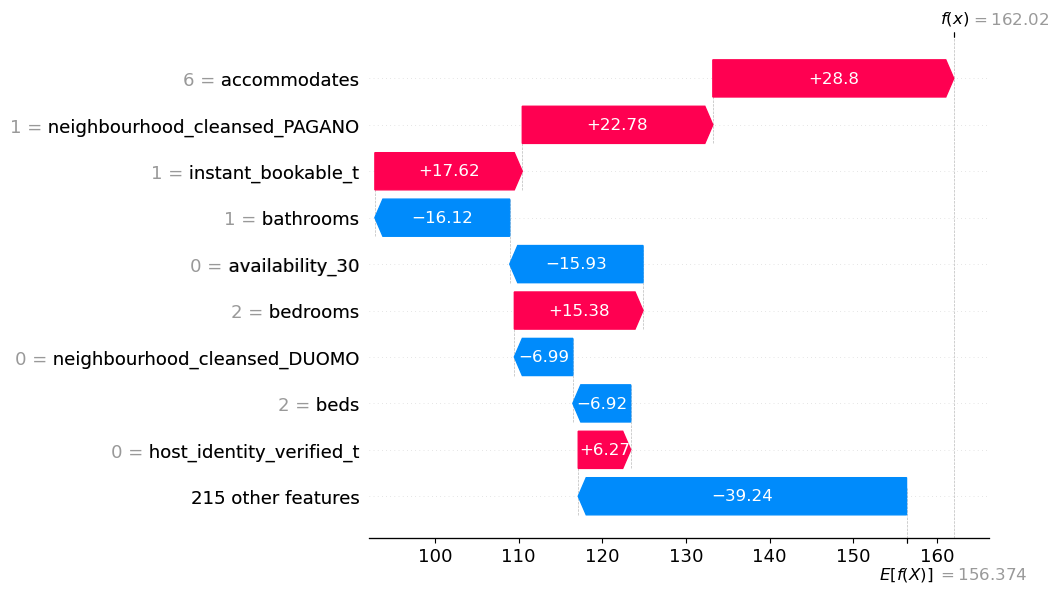

In [184]:
shap.plots.waterfall(shap_values[1])

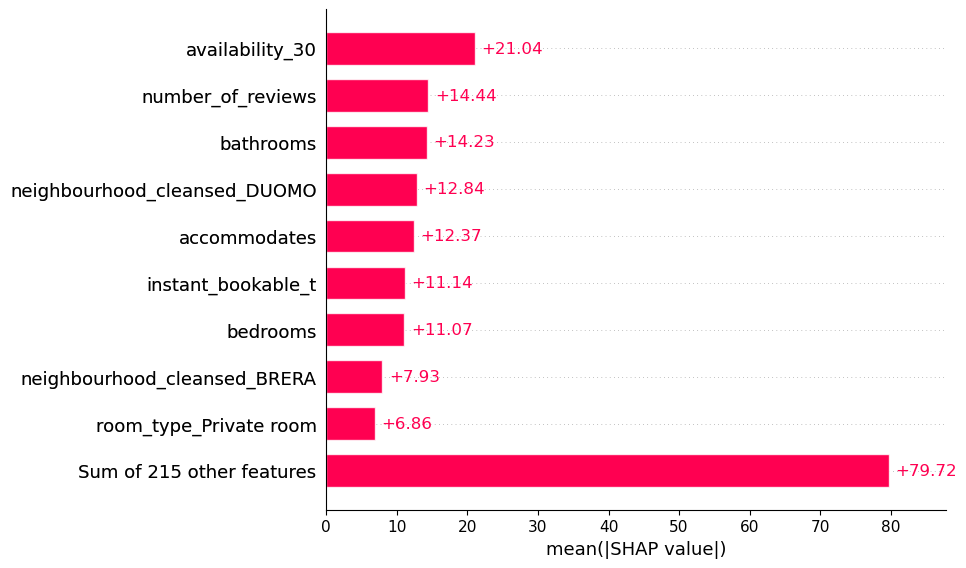

In [185]:
shap.plots.bar(shap_values)

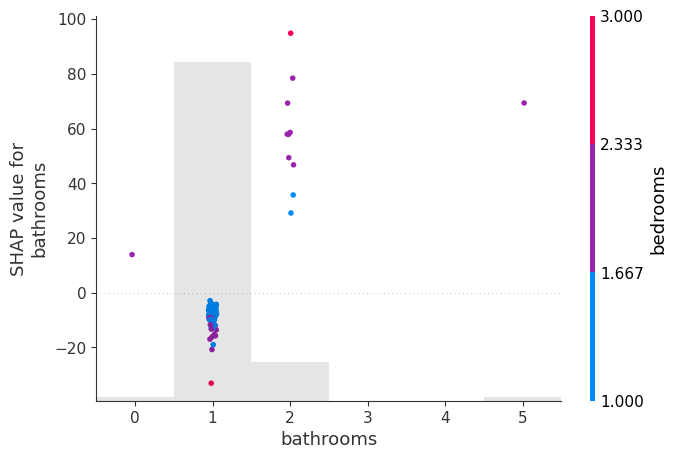

In [186]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "bathrooms"], color=shap_values)

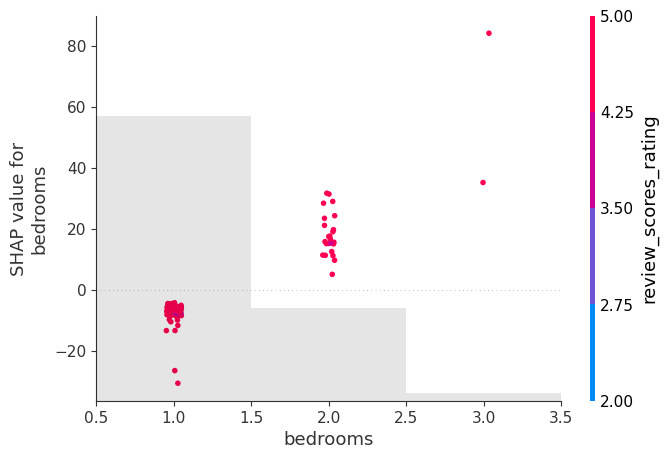

In [187]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "bedrooms"], color=shap_values)

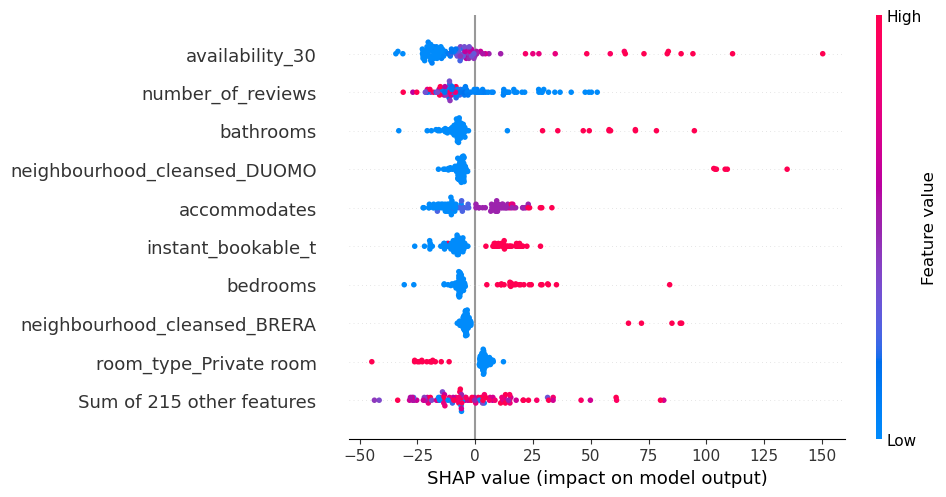

In [188]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

In [189]:
len(shap_values[0]) == X.columns.shape[0]

True